# Proyek Analisis Data: Air Quality
- **Nama:** Chamzal Noer Haiky
- **Email:** m131d4ky2254@bangkit.academy
- **ID Dicoding:** M131D4KY2254

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas udara antara kota Chanping dan Kota Dongsi berdasarkan PM2.5 per bulan pada tahun 2013-2017
- Bagaimana hubungan polusi PM2.5 dengan PM10 di Kota Dongsi pada tahun 2013-2017

## Import Semua Packages/Library yang Digunakan

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

### Gathering Data

Pada Gathering data ini kita hanya menggunakan dataset dari kota Chanping dan Dongsi

In [ ]:
chanping_df = pd.read_csv("https://drive.google.com/uc?id=1n9NqvkKY0Y9eMChWBdVKhH5gIMe_mT6t")
dongsi_df = pd.read_csv("https://drive.google.com/uc?id=1LT4j1PcDLT-OVP-3jsn9p6eZPsGZCaE_")
chanping_df.head()

In [ ]:
dongsi_df.head()

### Assessing Data

**Menilai tabel `chanping_df`**

In [ ]:
chanping_df.info()


In [ ]:
chanping_df.isna().sum()


In [ ]:
chanping_df.describe()


**Menilai tabel `dongsi_df`**

In [ ]:

dongsi_df.info()


In [ ]:
dongsi_df.isna().sum()


In [ ]:
dongsi_df.describe()


### Cleaning Data

**Mengganti nama kolom PM2.5 di `chanping_df` dan `donsi_df`**
- mengganti nama kolom supaya mempermudah pemanggilan kolomnya

In [134]:
chanping_df.columns = chanping_df.columns.str.replace('PM2.5', 'PM25')
dongsi_df.columns = dongsi_df.columns.str.replace('PM2.5', 'PM25')

<ipython-input-134-a67b1152aa72>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  chanping_df.columns = chanping_df.columns.str.replace('PM2.5', 'PM25')
<ipython-input-134-a67b1152aa72>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dongsi_df.columns = dongsi_df.columns.str.replace('PM2.5', 'PM25')


**Membersihkan tabel `chanping_df`**

Duplicate Data

In [ ]:
print("Jumlah duplikasi: ", chanping_df.duplicated().sum())

Missing Value
- Kita hanya mengedit value dari PM2.5 dan PM10 karena sesuai yang dibutuhkan pertanyaan bisnisnya

In [ ]:
chanping_df.isna().sum()


In [ ]:
chanping_df[chanping_df.PM25.isna()]


- Kita mengganti PM2.5 dengan nilai rata rata pada kolom dataset tersebut karena kalau kita hilangkan barisnya maka banyak data yang akan hilang

In [29]:
chanping_df.PM25.fillna(value=chanping_df.PM25.mean(), inplace=True)
print("Jumlah Kolom PM2.5 yang tidak ada nilainya : ", chanping_df.PM25.isna().sum())


Jumlah Kolom PM2.5 yang tidak ada nilainya :  0


- Sama dengan kolom PM10 kita ganti nilai yang kosong dengan nilai rata-rata

In [ ]:
chanping_df.PM10.fillna(value=chanping_df.PM10.mean(), inplace=True)
print("Jumlah Kolom PM10 yang tidak ada nilainya : ", chanping_df.PM25.isna().sum())


Inaccurate value
- pada cleaning ini kita tidak mengubah dikarenakan tidak ada batas maksimal ukuran pada polusi PM2.5 dan PM10

In [ ]:
chanping_df.PM25.describe()

In [ ]:
chanping_df.PM10.describe()

**Membersihkan tabel `dongsi_df`**

Duplicate Data

In [ ]:
print("Jumlah duplikasi: ", dongsi_df.duplicated().sum())

Missing Value
- Kita hanya mengedit value dari PM2.5 dan PM10 karena sesuai yang dibutuhkan pertanyaan bisnisnya

In [ ]:
dongsi_df.isna().sum()


In [ ]:
dongsi_df[dongsi_df.PM25.isna()]


- Kita mengganti PM2.5 dengan nilai rata rata pada kolom dataset tersebut karena kalau kita hilangkan barisnya maka banyak data yang akan hilang

In [43]:
dongsi_df.PM25.fillna(value=dongsi_df.PM25.mean(), inplace=True)
print("Jumlah Kolom PM2.5 yang tidak ada nilainya : ", dongsi_df.PM25.isna().sum())


Jumlah Kolom PM2.5 yang tidak ada nilainya :  0


- Sama dengan kolom PM10 kita ganti nilai yang kosong dengan nilai rata-rata

In [44]:
dongsi_df.PM10.fillna(value=chanping_df.PM10.mean(), inplace=True)
print("Jumlah Kolom PM10 yang tidak ada nilainya : ", dongsi_df.PM25.isna().sum())


Jumlah Kolom PM10 yang tidak ada nilainya :  0


Inaccurate value
- pada cleaning ini kita tidak mengubah dikarenakan tidak ada batas maksimal ukuran pada polusi PM2.5 dan PM10

In [ ]:
dongsi_df.PM25.describe()

In [ ]:
dongsi_df.PM10.describe()

## Exploratory Data Analysis (EDA)

### Explore `chanping_df` dan `dongsi_df` (Pertanyaan 1)
- disini kita akan melihat data polusi PM2.5 pada Kota Chanping dan Kota Dongsi berdasarkan bulan di tahun 2013-2017

In [ ]:
chanping_df.groupby(by='month').agg({
  'PM25':'mean'
})

In [ ]:
dongsi_df.groupby(by='month').agg({
  'PM25':'mean'
})

### Explore `dongsi_df` (Pertanyaan 2)
- disini kita akan melihat data polusi PM2.5 dan PM10 pada Kota Dongsi berdasarkan bulan di tahun 2013-2017

In [ ]:
dongsi_df.groupby(by='month').agg({
  'PM25':'mean',
  'PM10':'mean'
})

In [51]:
korelasicek = pd.DataFrame({
    'PM2.5': dongsi_df.PM25,
    'PM10': dongsi_df.PM10
})

korelasicek.corr()

,PM2.5,PM10
PM2.5,1.00000,0.88683
PM10,0.88683,1.00000


## Visualization & Explanatory Analysis


### Pertanyaan 1: Bagaimana kualitas udara antara kota Chanping dan Kota Dongsi berdasarkan PM2.5 per bulan pada tahun 2013-2017

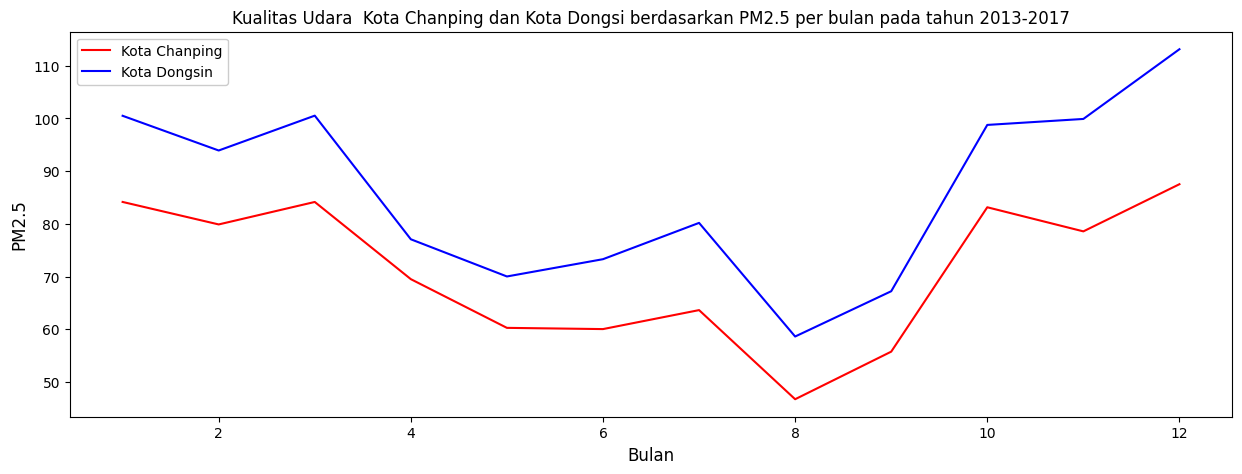

In [163]:
chan = chanping_df.groupby(by='month').agg({
  'PM25':'mean'
})

dong = dongsi_df.groupby(by='month').agg({
  'PM25':'mean'
})


merge_df = pd.merge(
    left = chan,
    right = dong,
    how = "outer",
    left_on = "month",
    right_on = "month"
)

# merge_df.columns = merge_df.columns.str.replace('PM25_x', 'PM25 Kota Chanping')
# merge_df.columns = merge_df.columns.str.replace('PM25_y', 'PM25 Kota Dongsi')

merge_df['bulan'] = range(1, 1 + len(merge_df))

merge_df.head()
plt.figure(figsize=(15, 5))
plt.plot(merge_df['bulan'], merge_df['PM25_x'], color='red', label='Kota Chanping')
plt.plot(merge_df['bulan'], merge_df['PM25_y'], color='blue', label='Kota Dongsin')
plt.xlabel('Bulan',size=12)
plt.ylabel('PM2.5',size=12)
plt.title('Kualitas Udara  Kota Chanping dan Kota Dongsi berdasarkan PM2.5 per bulan pada tahun 2013-2017')
plt.legend(framealpha=1, frameon=True);

### Pertanyaan 2: Bagaimana hubungan polusi PM2.5 dengan PM10 di Kota Dongsi pada tahun 2013-2017

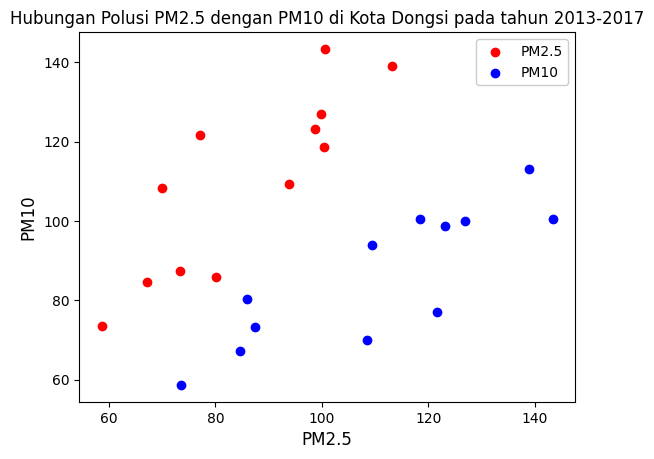

In [162]:
dongsi_pm25 = dongsi_df.groupby(by='month').agg({
  'PM25':'mean'
})

dongsi_pm10 = dongsi_df.groupby(by='month').agg({
  'PM10':'mean'
})

merge_df = pd.merge(
    left = dongsi_pm25,
    right = dongsi_pm10,
    how = "outer",
    left_on = "month",
    right_on = "month"
)

merge_df['bulan'] = range(1, 1 + len(merge_df))

plt.scatter(merge_df['PM25'],merge_df['PM10'],color='red', label='PM2.5')
plt.scatter(merge_df['PM10'],merge_df['PM25'],color='blue', label='PM10')
plt.title('Hubungan Polusi PM2.5 dengan PM10 di Kota Dongsi pada tahun 2013-2017')
plt.xlabel('PM2.5',size=12)
plt.ylabel('PM10',size=12)
plt.legend(framealpha=1, frameon=True);

## Conclusion

## Konklusi pertanyaan 1
  Bagaimana kualitas udara antara kota Chanping dan Kota Dongsi berdasarkan PM2.5 per bulan pada tahun 2013-2017
  - Kualitas udara Kota Dongsin lebih buruk dibandingkan Kota Chanping
  - Setiap awal tahun (januari dan februari) dan akhir tahun (oktober - desember) mengalami peningkatan signifikan diantara bulan lainnya
### Saran : Warga Kota Chanping dan Kota Dongsi diharap untuk menggunakan masker pada waktu awal bulan dan akhir bulan serta untuk menanggulangi polusi diharap warga menggunakan kendaraan tidak bermotor apabila keperluannya tidak mendesak

## Konklusi pertanyaan 2
  Bagaimana hubungan polusi PM2.5 dengan PM10 di Kota Dongsi pada tahun 2013-2017
  - hubungan antar polusi PM2.5 dan PM10 yaitu linier semakin tinggi polusi PM10 maka semakin tinggi juga tingkat polusi PM2.5 dibuktikan juga pada bagian exploretory tingkat korelasi menunjukkan 0.8 yaitu berhubungan kuat dan linier
### Saran : Untuk pemerintahan kota membuat regulasi bagaimana supaya tingkat polusi menurun